# Generative Adversarial Networks

<img src="GAN.JPG">

## Download MNIST and load it

In [ ]:
# import os
# import random
# import numpy as np
# import tensorflow as tf
# import matplotlib.pyplot as plt
# %matplotlib inline

# import sys
# import shutil
# from six.moves import urllib
# import gzip
# import cPickle
# import imageio


# SOURCE_URL = 'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
# FILENAME = SOURCE_URL.split('/')[-1]
# DATA_DIR = './datasets'


# def img_tile(imgs, aspect_ratio=1.0, tile_shape=None, border=1,
#              border_color=0):
#     ''' Tile images in a grid.
#     If tile_shape is provided only as many images as specified in tile_shape
#     will be included in the output.
#     '''

#     imgs = np.array(imgs)
#     if imgs.ndim != 3 and imgs.ndim != 4:
#         raise ValueError('imgs has wrong number of dimensions.')
#     n_imgs = imgs.shape[0]

#     # Grid shape
#     img_shape = np.array(imgs.shape[1:3])
#     if tile_shape is None:
#         img_aspect_ratio = img_shape[1] / float(img_shape[0])
#         aspect_ratio *= img_aspect_ratio
#         tile_height = int(np.ceil(np.sqrt(n_imgs * aspect_ratio)))
#         tile_width = int(np.ceil(np.sqrt(n_imgs / aspect_ratio)))
#         grid_shape = np.array((tile_height, tile_width))
#     else:
#         assert len(tile_shape) == 2
#         grid_shape = np.array(tile_shape)

#     # Tile image shape
#     tile_img_shape = np.array(imgs.shape[1:])
#     tile_img_shape[:2] = (img_shape[:2] + border) * grid_shape[:2] - border

#     # Assemble tile image
#     tile_img = np.empty(tile_img_shape)
#     tile_img[:] = border_color
#     for i in range(grid_shape[0]):
#         for j in range(grid_shape[1]):
#             img_idx = j + i * grid_shape[1]
#             if img_idx >= n_imgs:
#                 # No more images - stop filling out the grid.
#                 break
#             img = imgs[img_idx]
#             yoff = (img_shape[0] + border) * i
#             xoff = (img_shape[1] + border) * j
#             tile_img[yoff:yoff + img_shape[0], xoff:xoff + img_shape[1], ...] = img

#     return tile_img


# def maybe_download(data_dir):
#     filepath = os.path.join(data_dir, FILENAME)
#     if not os.path.exists(data_dir):
#         os.makedirs(data_dir)
#     if not os.path.isfile(filepath):
#         def _progress(count, block_size, total_size):
#             sys.stdout.write('\r>> Downloading {} {:.1f} %'.format(
#                 FILENAME, float(count * block_size) / float(total_size) * 100.0))
#             sys.stdout.flush()
#         filepath, _ = urllib.request.urlretrieve(SOURCE_URL, filepath, _progress)
#         print()
#         statinfo = os.stat(filepath)
#         print('Successfully donloaded', FILENAME, statinfo.st_size, 'bytes.')


# def load(data_dir, subset='train'):
#     maybe_download(data_dir)
#     filepath = os.path.join(data_dir, FILENAME)

#     f = gzip.open(filepath, 'rb')
#     train_set, valid_set, test_set = cPickle.load(f)
#     f.close()

#     if subset == 'train':
#         trainx, trainy = train_set
#         trainx = trainx.astype(np.float32).reshape(trainx.shape[0], 28, 28)
#         trainy = trainy.astype(np.uint8)
#         return trainx, trainy
#     elif subset == 'test':
#         testx, testy = test_set
#         testx = testx.astype(np.float32).reshape(testx.shape[0], 28, 28)
#         testy = testy.astype(np.uint8)
#         return testx, testy
#     elif subset == 'valid':
#         validx, validy = valid_set
#         validx = validx.astype(np.float32).reshape(validx.shape[0], 28, 28)
#         validy = validy.astype(np.uint8)
#         return validx, validy
#     else:
#         raise NotImplementedError('subset should be train or valid or test')

# # Load data
# train_data, train_label = load(DATA_DIR, 'train')
# valid_data, valid_label = load(DATA_DIR, 'valid')
# test_data, test_label = load(DATA_DIR, 'test')

# # concatenate train and valid data as train data
# train_data = np.concatenate((train_data, valid_data))
# train_label = np.concatenate((train_label, valid_label))

In [2]:
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import shutil

from keras.datasets import mnist
(train_data, train_label), (test_data, test_label) = mnist.load_data()
train_data = train_data / 255.
test_data = test_data / 255.

def img_tile(imgs, aspect_ratio=1.0, tile_shape=None, border=1,
             border_color=0):
    ''' Tile images in a grid.
    If tile_shape is provided only as many images as specified in tile_shape
    will be included in the output.
    '''
    imgs = np.array(imgs)
    if imgs.ndim != 3 and imgs.ndim != 4:
        raise ValueError('imgs has wrong number of dimensions.')
    n_imgs = imgs.shape[0]

    # Grid shape
    img_shape = np.array(imgs.shape[1:3])
    if tile_shape is None:
        img_aspect_ratio = img_shape[1] / float(img_shape[0])
        aspect_ratio *= img_aspect_ratio
        tile_height = int(np.ceil(np.sqrt(n_imgs * aspect_ratio)))
        tile_width = int(np.ceil(np.sqrt(n_imgs / aspect_ratio)))
        grid_shape = np.array((tile_height, tile_width))
    else:
        assert len(tile_shape) == 2
        grid_shape = np.array(tile_shape)

    # Tile image shape
    tile_img_shape = np.array(imgs.shape[1:])
    tile_img_shape[:2] = (img_shape[:2] + border) * grid_shape[:2] - border

    # Assemble tile image
    tile_img = np.empty(tile_img_shape)
    tile_img[:] = border_color
    for i in range(grid_shape[0]):
        for j in range(grid_shape[1]):
            img_idx = j + i * grid_shape[1]
            if img_idx >= n_imgs:
                # No more images - stop filling out the grid.
                break
            img = imgs[img_idx]
            yoff = (img_shape[0] + border) * i
            xoff = (img_shape[1] + border) * j
            tile_img[yoff:yoff + img_shape[0], xoff:xoff + img_shape[1], ...] = img

    return tile_img


def plot_network_output(data, reconst_data, generated, step):
    num = 8
    
    fig, ax = plt.subplots(nrows=3, ncols=num, figsize=(18, 6))
    for i in xrange(num):
        ax[(0, i)].imshow(np.squeeze(generated[i]), cmap=plt.cm.gray)
        ax[(1, i)].imshow(np.squeeze(data[i]), cmap=plt.cm.gray)
        ax[(2, i)].imshow(np.squeeze(reconst_data[i]), cmap=plt.cm.gray)
        ax[(0, i)].axis('off')
        ax[(1, i)].axis('off')
        ax[(2, i)].axis('off')

    fig.suptitle('Top: generated | Middle: data | Bottom: recunstructed')
#     plt.show()
    plt.savefig(IMAGE_DIR + '/{}.png'.format(str(step).zfill(6)))
    plt.close()

Using TensorFlow backend.


## show MNIST

In [3]:
# size of MNIST
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


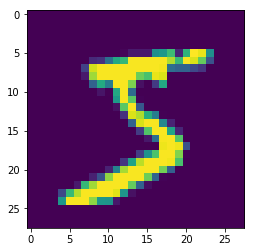

In [4]:
plt.imshow(train_data[0], 'gray')

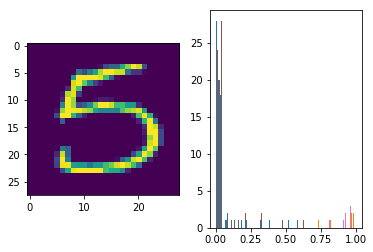

In [5]:
# show data
idx = np.random.randint(0, train_data.shape[0])
_, (ax1, ax2) = plt.subplots(1, 2)
sample_data = train_data[idx]
# ax1.imshow(sample_data, cmap=plt.cm.Greys);
ax1.imshow(np.array(sample_data*255, dtype=np.uint8), 'gray')
ax2.hist(sample_data, bins=20, range=[0, 1]);

## Delete summary folder and make it

In [6]:
SUMMARY_DIR = './gan_summary'
TRAIN_DIR = SUMMARY_DIR + '/train'
TEST_DIR = SUMMARY_DIR + '/test'
IMAGE_DIR = SUMMARY_DIR + '/image'

if os.path.exists(SUMMARY_DIR):
    shutil.rmtree(SUMMARY_DIR)
if not os.path.exists(SUMMARY_DIR):
    os.makedirs(SUMMARY_DIR)
    os.makedirs(TRAIN_DIR)
    os.makedirs(TEST_DIR)
    os.makedirs(IMAGE_DIR)

## Define tensorflow graph

In [7]:
def fully_connected(inputs, out_channel, name='fc'):
    """
    very simple fully connected layer function

    Args:
        inputs: a batch of input tensor [batch_size, n]
                where n is the number of input feature dimension
        out_channel: output channel dimension

    Returns:
        fc: inputs * weights + biases [batch_size, out_channel]
    """
    # in_channel: input channel dimension
    # w_shape: shape of weight matrix
    # b_shape: shape of bias vector
    in_channel = inputs.get_shape().as_list()[1]
    w_shape = [in_channel, out_channel]
    b_shape = [out_channel]

    # Define weight matrix variable, bias vector variable
    with tf.variable_scope(name):
        # To share the variables you have to use
        # a function 'tf.get_variable' instead of 'tf.Variable'
        weights = tf.get_variable('weights', shape=w_shape,
                                  initializer=tf.truncated_normal_initializer(stddev=0.02))
        biases = tf.get_variable('biases', shape=b_shape,
                                 initializer=tf.constant_initializer(0.0))

        fc = tf.matmul(inputs, weights)
        fc = tf.nn.bias_add(fc, biases)

        return fc


def discriminator(x, reuse=None):
    """
    build the discriminator

    Args:
        x: a batch of input to the network [batch_size, 28, 28, 1]

    returns:
        net: output of the discriminator [batch_size, 1]
    """
    with tf.variable_scope('discriminator') as scope:
        if reuse:
            scope.reuse_variables()

        # Vectorize the input x
        # Fully connected layer with 256 output units and 'fc1' as its name
        # Apply non-linearity function 'relu'
        # Fully connected layer with 1 output units and 'fc2' as its name
        # Apply non-linearity function 'sigmoid'
        # Return the final tensor
        net = tf.reshape(x, [x.get_shape().as_list()[0], -1])
        net = fully_connected(net, 256, name='fc1')
        net = tf.nn.relu(net)
        net = fully_connected(net, 1, name='fc2')
        net = tf.nn.sigmoid(net)
        return net


def generator(z):
    """
    build the generator

    Args:
        z: a batch of input to the network [batch_size, z_dim]

    Returns:
        net: output of the generator [batch_size, 28, 28, 1]
    """
    with tf.variable_scope('generator') as scope:

        # Unlike the discriminator, input z is a set of vectors
        
        # Fully connected layer with 256 output units and 'fc1' as its name
        # Apply non-linearity function 'relu'
        # Fully connected layer with 784 output units and 'fc2' as its name
        # Apply non-linearity function 'sigmoid'
        # Reshape final output to be a proper image file [28, 28, 1]
        # Return the final tensor
        net = fully_connected(z, 256, name='fc1')
        net = tf.nn.relu(net)
        net = fully_connected(net, 784, name='fc2')
        net = tf.nn.sigmoid(net)
        net = tf.reshape(net, [z.get_shape().as_list()[0], 28, 28, 1])
        return net


def get_loss(D_real, D_fake, eps=1e-10):
    """
    get loss of GAN

    Args:
        D_real: Real Discriminator output [batch_size, 1]
        D_rake: Fake discriminator output [batch_size, 1]

    Returns:
        D_loss: Discriminator loss
        G_loss: Generator loss
    """
    D_loss = -(tf.reduce_mean(tf.log(D_real + eps)) + tf.reduce_mean(tf.log(1 - D_fake + eps)))
    G_loss = -tf.reduce_mean(tf.log(D_fake + eps))

    return D_loss, G_loss


def get_next_batch(data, label, batch_size):
    """
    get 'batch_size' amount of data and label randomly

    Args:
        data: data
        label: label
        batch_size: # of data to get

    Returns:
        batch_data: data of 'batch_size'
        batch_label: coresponding label of batch_data
    """
    n_data = data.shape[0]
    random_idx = random.sample(range(1, n_data), batch_size)

    batch_data = data[random_idx]
    batch_label = label[random_idx]
    return batch_data, batch_label


# Set hyperparameters
batch_size = 100
z_dim = 128
max_step = 20000
lr = 0.001
beta1 = 0.9

train_data = np.expand_dims(train_data, 3)
test_data = np.expand_dims(test_data, 3)

############################# Build the model #############################
# Define image tensor x placeholder
x = tf.placeholder(tf.float32, [batch_size, 28, 28, 1], name='input_x')
# Define z vector as uniform distribution between [-1, 1]
z = tf.random_uniform((batch_size, z_dim), -1., 1., name='latent_z')

# Build discriminator where input data is real image x
D_real = discriminator(x, reuse=False)
# Build generator
G = generator(z)
# Build discriminator where input data is generated image G
D_fake = discriminator(G, reuse=True)

# Get D_loss and G_loss
D_loss, G_loss = get_loss(D_real, D_fake)

# Make optimization op
opt = tf.train.AdamOptimizer(lr, beta1=beta1)

# To update the generator and the discriminator
# get their network parameters
G_params = [param for param in tf.trainable_variables()
            if 'generator' in param.name]
D_params = [param for param in tf.trainable_variables()
            if 'discriminator' in param.name]

# Make train op for each network
D_train = opt.minimize(D_loss, var_list=D_params)
G_train = opt.minimize(G_loss, var_list=G_params)

# Make initialization op
init = tf.global_variables_initializer()

# Add summary and make op to add summary data to event log
tf.summary.scalar('Generator_loss', G_loss)
tf.summary.scalar('Discriminator_loss', D_loss)
merged = tf.summary.merge_all()

## Train GAN

Training data


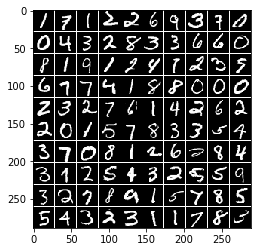

0 steps |  G_loss: 0.8913, D_loss: 1.4046


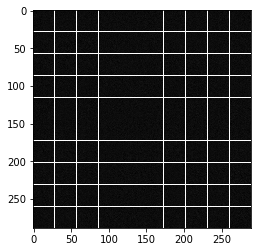

200 steps |  G_loss: 5.7217, D_loss: 0.0201


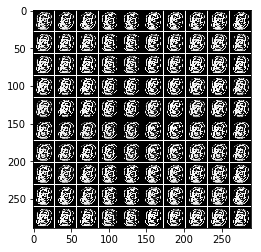

400 steps |  G_loss: 6.1879, D_loss: 0.0123


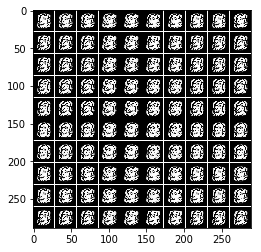

600 steps |  G_loss: 7.1400, D_loss: 0.0300


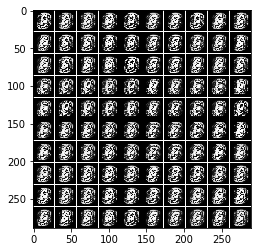

800 steps |  G_loss: 6.6301, D_loss: 0.0745


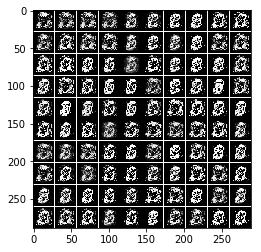

1000 steps |  G_loss: 5.7497, D_loss: 0.0361


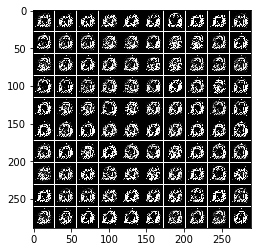

1200 steps |  G_loss: 7.4491, D_loss: 0.0032


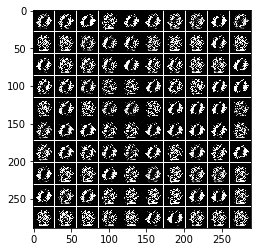

1400 steps |  G_loss: 6.1938, D_loss: 0.1200


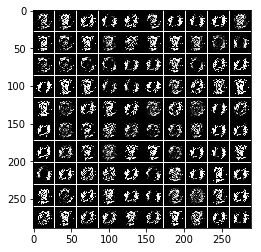

1600 steps |  G_loss: 6.1434, D_loss: 0.0588


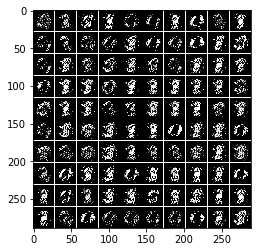

1800 steps |  G_loss: 4.7050, D_loss: 0.0933


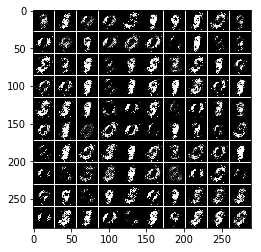

2000 steps |  G_loss: 6.1194, D_loss: 0.0548


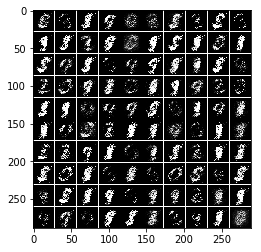

2200 steps |  G_loss: 4.7320, D_loss: 0.1125


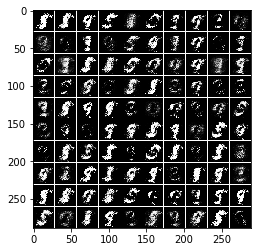

2400 steps |  G_loss: 5.3268, D_loss: 0.1210


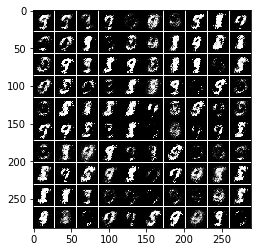

2600 steps |  G_loss: 6.1762, D_loss: 0.0572


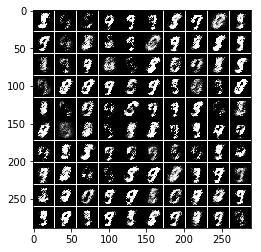

2800 steps |  G_loss: 5.1704, D_loss: 0.1804


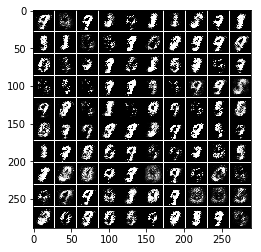

3000 steps |  G_loss: 5.1773, D_loss: 0.4486


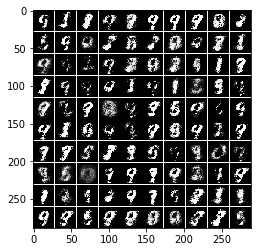

3200 steps |  G_loss: 3.7113, D_loss: 0.1698


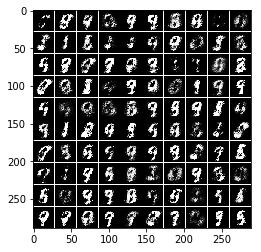

3400 steps |  G_loss: 4.4509, D_loss: 0.2342


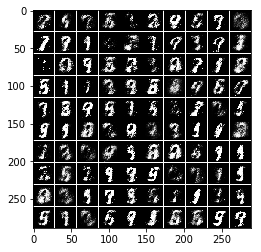

3600 steps |  G_loss: 4.8898, D_loss: 0.3187


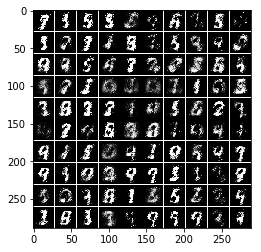

3800 steps |  G_loss: 6.1327, D_loss: 0.2101


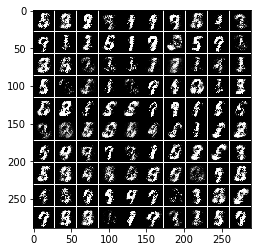

4000 steps |  G_loss: 5.0060, D_loss: 0.2963


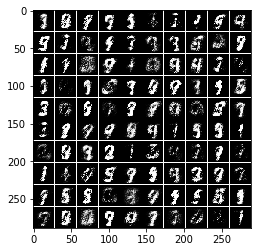

4200 steps |  G_loss: 4.8529, D_loss: 0.2908


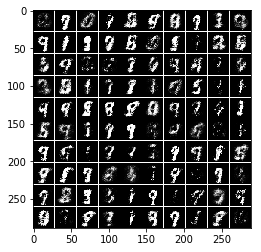

4400 steps |  G_loss: 4.0064, D_loss: 0.4541


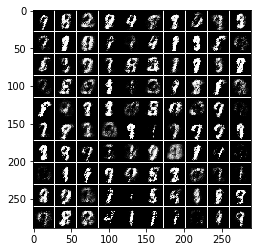

4600 steps |  G_loss: 4.8146, D_loss: 0.2633


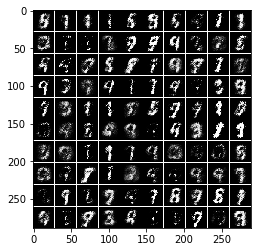

4800 steps |  G_loss: 3.5581, D_loss: 0.3231


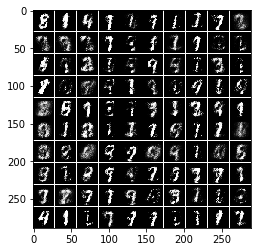

5000 steps |  G_loss: 4.6995, D_loss: 0.3309


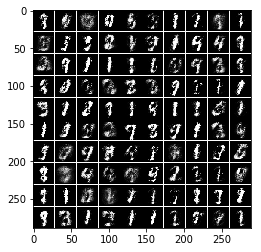

5200 steps |  G_loss: 4.6270, D_loss: 0.3674


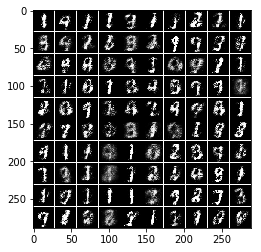

5400 steps |  G_loss: 3.8541, D_loss: 0.3985


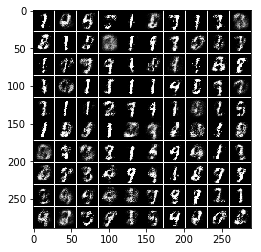

5600 steps |  G_loss: 4.3501, D_loss: 0.6710


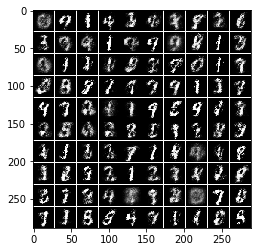

5800 steps |  G_loss: 3.2257, D_loss: 0.4604


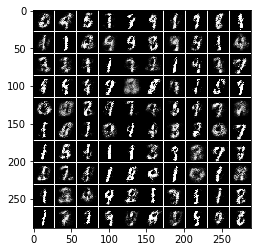

6000 steps |  G_loss: 3.3173, D_loss: 0.7637


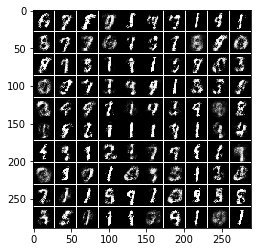

6200 steps |  G_loss: 3.1521, D_loss: 0.4056


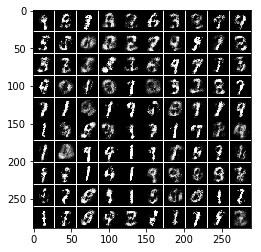

6400 steps |  G_loss: 3.4783, D_loss: 0.4740


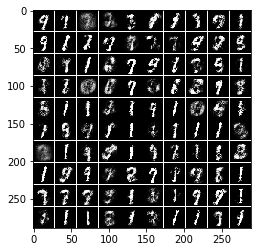

6600 steps |  G_loss: 3.7189, D_loss: 0.4356


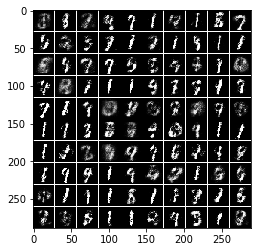

6800 steps |  G_loss: 3.0075, D_loss: 0.4629


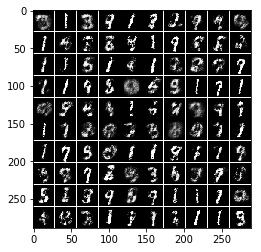

7000 steps |  G_loss: 4.0031, D_loss: 0.2978


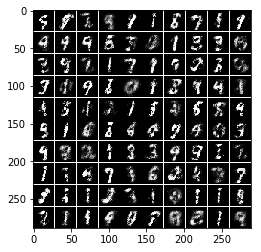

7200 steps |  G_loss: 3.7457, D_loss: 0.3929


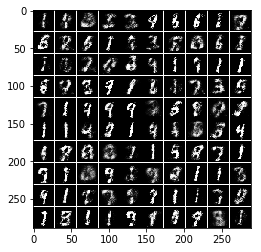

7400 steps |  G_loss: 2.5478, D_loss: 0.6135


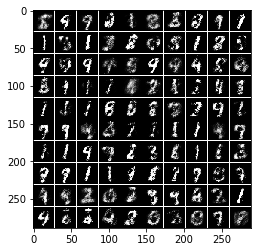

7600 steps |  G_loss: 3.7373, D_loss: 0.3583


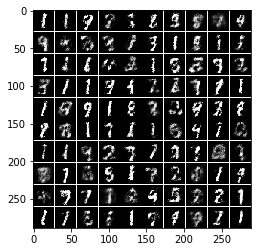

7800 steps |  G_loss: 3.6332, D_loss: 0.5323


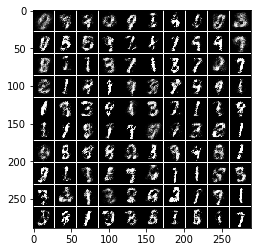

8000 steps |  G_loss: 3.3197, D_loss: 0.5092


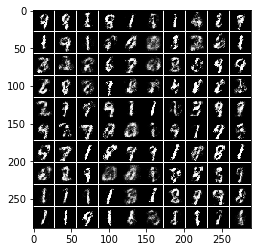

8200 steps |  G_loss: 3.8555, D_loss: 0.4576


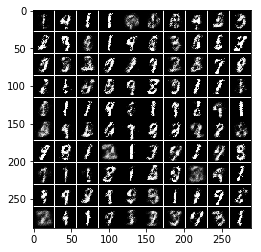

8400 steps |  G_loss: 3.7998, D_loss: 0.6227


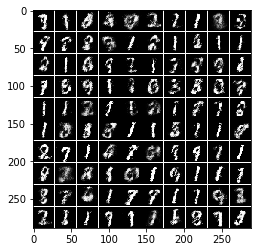

8600 steps |  G_loss: 3.2348, D_loss: 0.6104


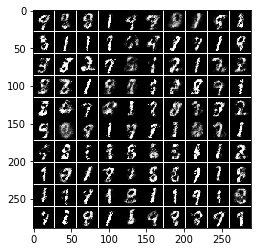

8800 steps |  G_loss: 2.9220, D_loss: 0.7398


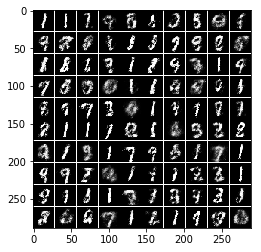

9000 steps |  G_loss: 3.2109, D_loss: 0.6015


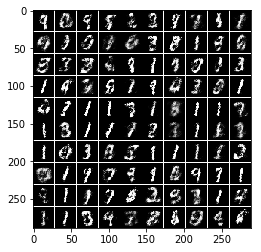

9200 steps |  G_loss: 2.5628, D_loss: 0.7213


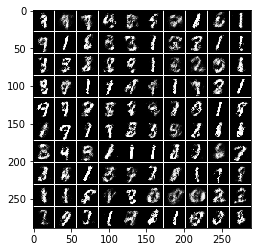

9400 steps |  G_loss: 3.1961, D_loss: 0.8271


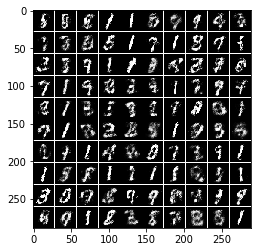

9600 steps |  G_loss: 3.0293, D_loss: 0.6867


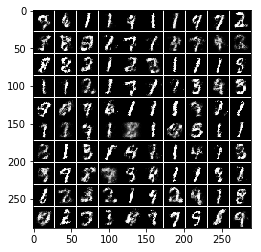

9800 steps |  G_loss: 2.3172, D_loss: 0.6893


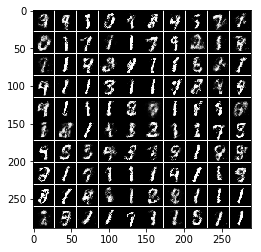

10000 steps |  G_loss: 3.1437, D_loss: 0.8985


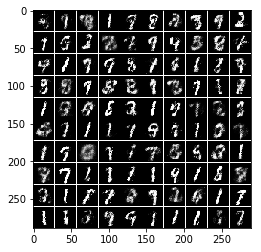

10200 steps |  G_loss: 3.9097, D_loss: 0.5444


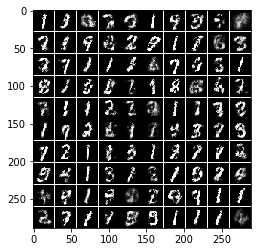

10400 steps |  G_loss: 2.4804, D_loss: 0.8824


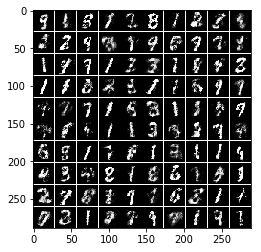

10600 steps |  G_loss: 2.7753, D_loss: 0.7935


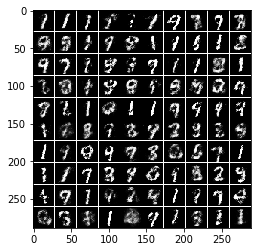

10800 steps |  G_loss: 2.8966, D_loss: 0.5194


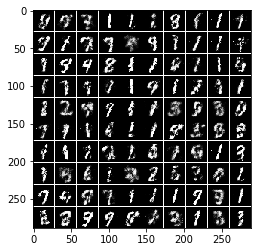

11000 steps |  G_loss: 2.5057, D_loss: 0.7512


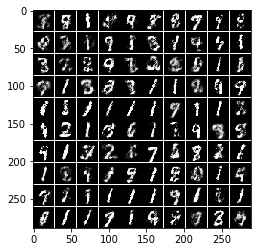

11200 steps |  G_loss: 2.9052, D_loss: 0.8494


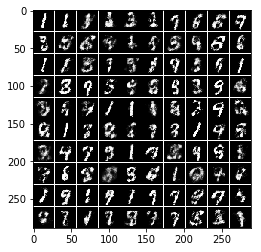

11400 steps |  G_loss: 2.0360, D_loss: 0.9385


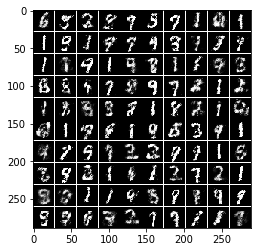

11600 steps |  G_loss: 2.7039, D_loss: 0.6429


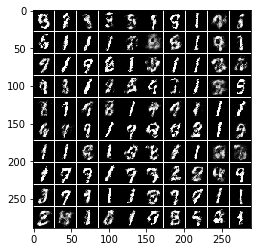

11800 steps |  G_loss: 3.2598, D_loss: 0.5166


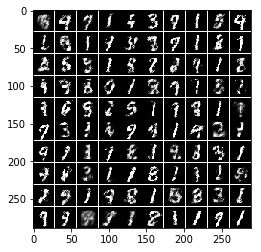

12000 steps |  G_loss: 2.7784, D_loss: 0.6545


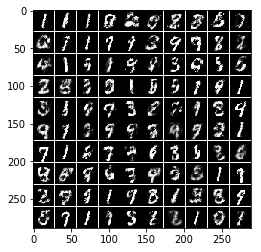

12200 steps |  G_loss: 3.4240, D_loss: 0.6818


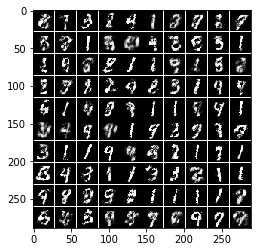

12400 steps |  G_loss: 2.4991, D_loss: 0.6190


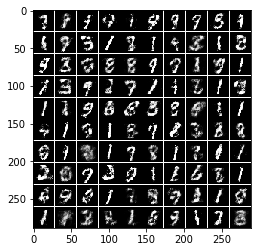

12600 steps |  G_loss: 2.6180, D_loss: 0.5984


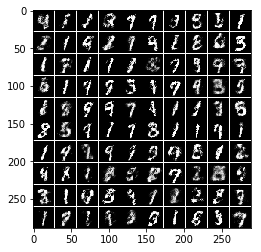

12800 steps |  G_loss: 3.0111, D_loss: 0.6093


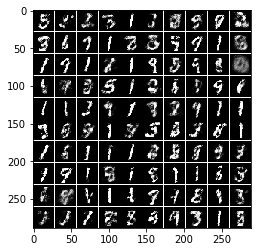

13000 steps |  G_loss: 2.0476, D_loss: 0.6236


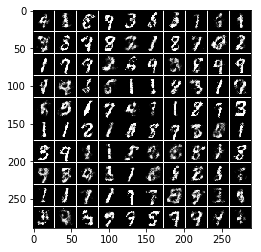

13200 steps |  G_loss: 2.6517, D_loss: 0.8642


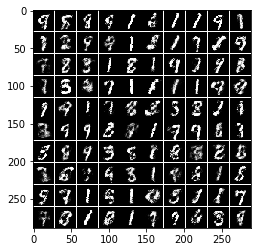

13400 steps |  G_loss: 2.6851, D_loss: 0.7703


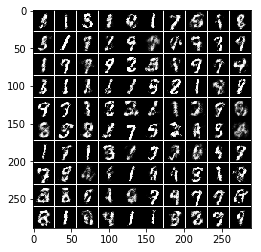

13600 steps |  G_loss: 2.5319, D_loss: 0.8254


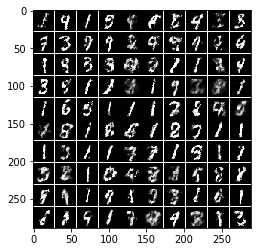

13800 steps |  G_loss: 2.1898, D_loss: 0.6916


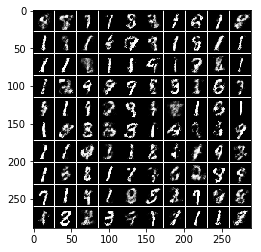

14000 steps |  G_loss: 2.4345, D_loss: 0.7091


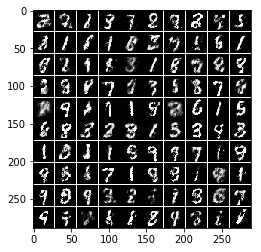

14200 steps |  G_loss: 2.8701, D_loss: 0.7930


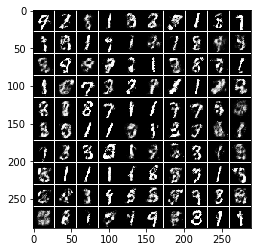

14400 steps |  G_loss: 2.6723, D_loss: 0.4556


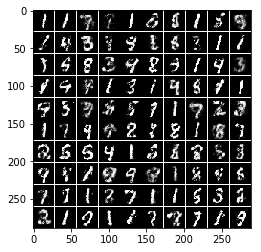

14600 steps |  G_loss: 2.3502, D_loss: 0.5363


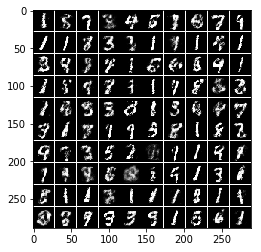

14800 steps |  G_loss: 2.1780, D_loss: 0.7621


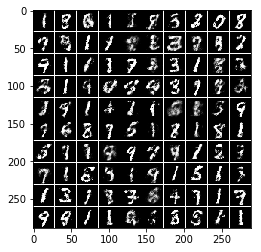

15000 steps |  G_loss: 2.2265, D_loss: 0.6391


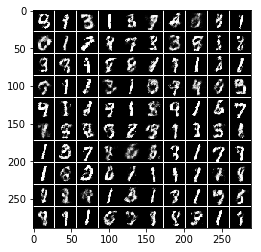

15200 steps |  G_loss: 2.4035, D_loss: 0.8582


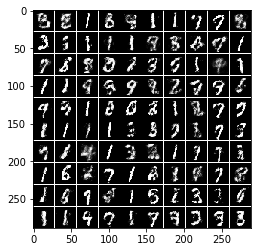

15400 steps |  G_loss: 2.6268, D_loss: 0.6278


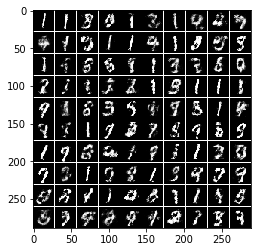

15600 steps |  G_loss: 2.0168, D_loss: 0.7245


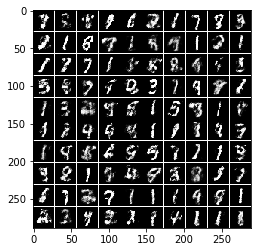

15800 steps |  G_loss: 3.2234, D_loss: 0.5217


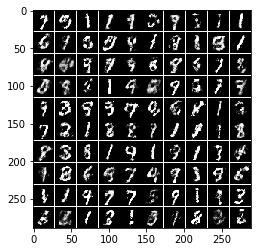

16000 steps |  G_loss: 2.2895, D_loss: 0.6480


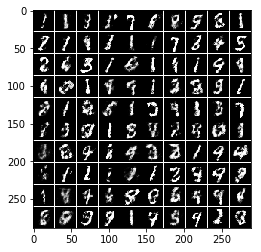

16200 steps |  G_loss: 2.5827, D_loss: 0.6618


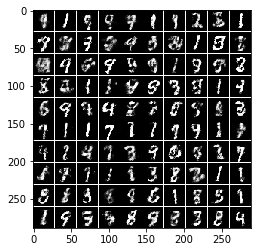

16400 steps |  G_loss: 2.5696, D_loss: 0.7372


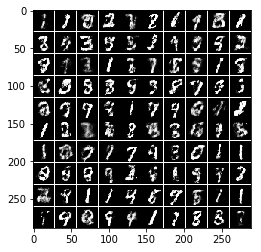

16600 steps |  G_loss: 2.4570, D_loss: 0.7364


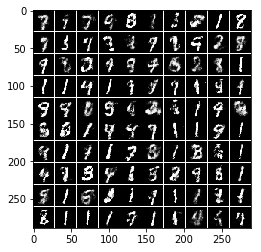

16800 steps |  G_loss: 2.3505, D_loss: 0.7341


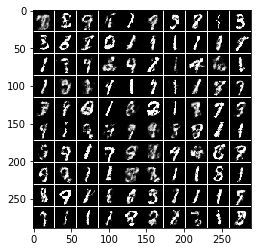

17000 steps |  G_loss: 2.4974, D_loss: 0.7707


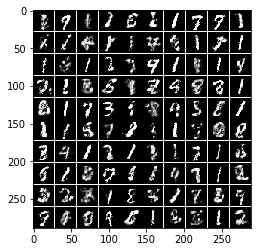

17200 steps |  G_loss: 2.5371, D_loss: 0.6573


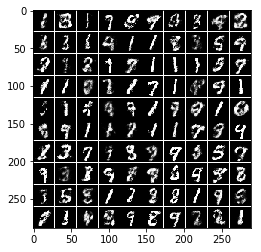

17400 steps |  G_loss: 2.1438, D_loss: 0.9236


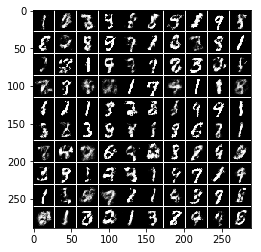

17600 steps |  G_loss: 2.2646, D_loss: 0.6670


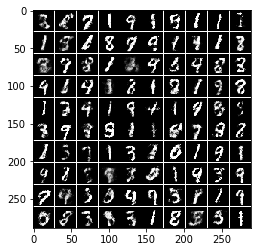

17800 steps |  G_loss: 2.2664, D_loss: 0.9330


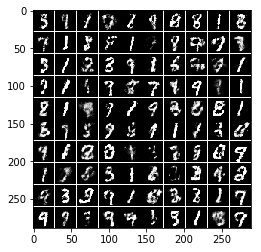

18000 steps |  G_loss: 2.5282, D_loss: 0.5231


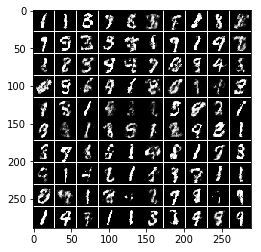

18200 steps |  G_loss: 2.4176, D_loss: 0.6946


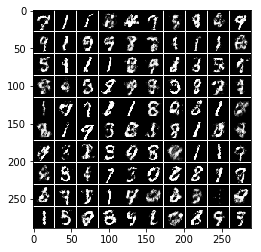

18400 steps |  G_loss: 2.6060, D_loss: 0.5178


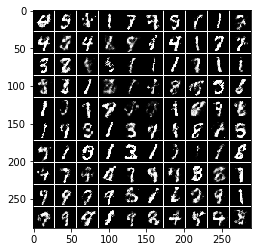

18600 steps |  G_loss: 2.7726, D_loss: 0.4452


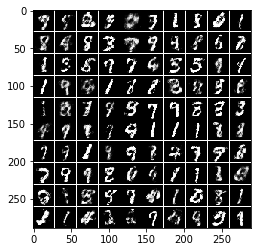

18800 steps |  G_loss: 2.2429, D_loss: 0.7109


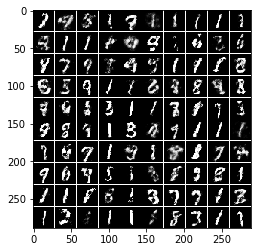

19000 steps |  G_loss: 1.8125, D_loss: 0.8354


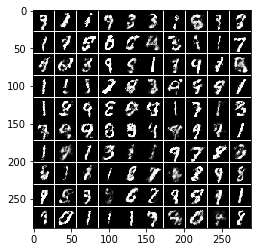

19200 steps |  G_loss: 2.3117, D_loss: 0.5611


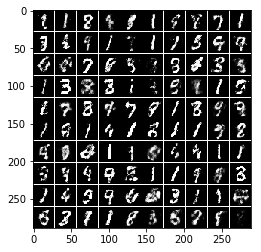

19400 steps |  G_loss: 2.3848, D_loss: 0.6642


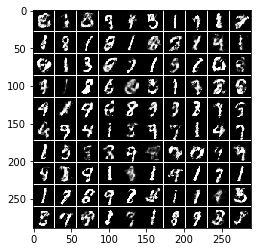

19600 steps |  G_loss: 2.7405, D_loss: 0.5299


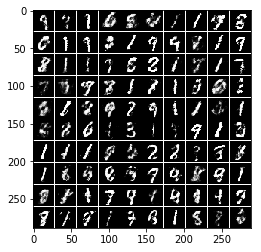

19800 steps |  G_loss: 2.5686, D_loss: 0.7415


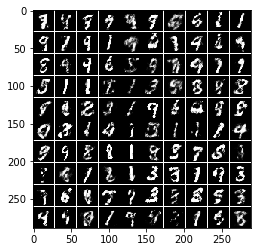

In [8]:
with tf.Session() as sess:
    # Define writer
    train_writer = tf.summary.FileWriter(TRAIN_DIR, sess.graph)
    test_writer = tf.summary.FileWriter(TEST_DIR)
    
    # Initialize variables
    sess.run(init)
    
    # Before train the model, shows train data and save it
    batch_x, batch_y = get_next_batch(train_data, train_label, batch_size)
    train_tiled = img_tile(batch_x, border_color=1.0)
    train_tiled = np.squeeze(train_tiled)
    print("Training data")
    plt.imshow(train_tiled, cmap=plt.cm.gray)
    plt.show()
    plt.imsave(IMAGE_DIR + '/train.png', train_tiled, cmap=plt.cm.gray)
    
    samples = []
    for step in range(max_step):
        batch_x, batch_y = get_next_batch(train_data, train_label, batch_size)
        
        _, d_loss = sess.run([D_train, D_loss], feed_dict={x: batch_x})
        _, g_loss = sess.run([G_train, G_loss])
        summary = sess.run(merged, feed_dict={x: batch_x})
        train_writer.add_summary(summary, step)
        
        # Save generarted data to make gif files
        if step % 50 == 0:
            g = sess.run(G)
            g_tiled = img_tile(g, border_color=1.0)
            g_tiled = np.squeeze(g_tiled)
            samples.append(g_tiled)
        if step % 200 == 0:
            print("{} steps |  G_loss: {:.4f}, D_loss: {:.4f}".format(step, g_loss, d_loss))
            plt.imshow(g_tiled, cmap=plt.cm.gray)
            plt.show()
            plt.imsave(IMAGE_DIR + '/{}.png'.format(str(step).zfill(6)),
                       g_tiled, cmap=plt.cm.gray)
#             plt.close()



In [9]:
import imageio
# Make gif files
imageio.mimsave(SUMMARY_DIR + '/generated.gif', samples)